# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка.

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов.

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

Напомним порядок расположения признаков в массиве данных

In [156]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [157]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [158]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [159]:
print(type(iris_dataset['data']))
iris_dataset['data'].shape

<class 'numpy.ndarray'>


(150, 4)

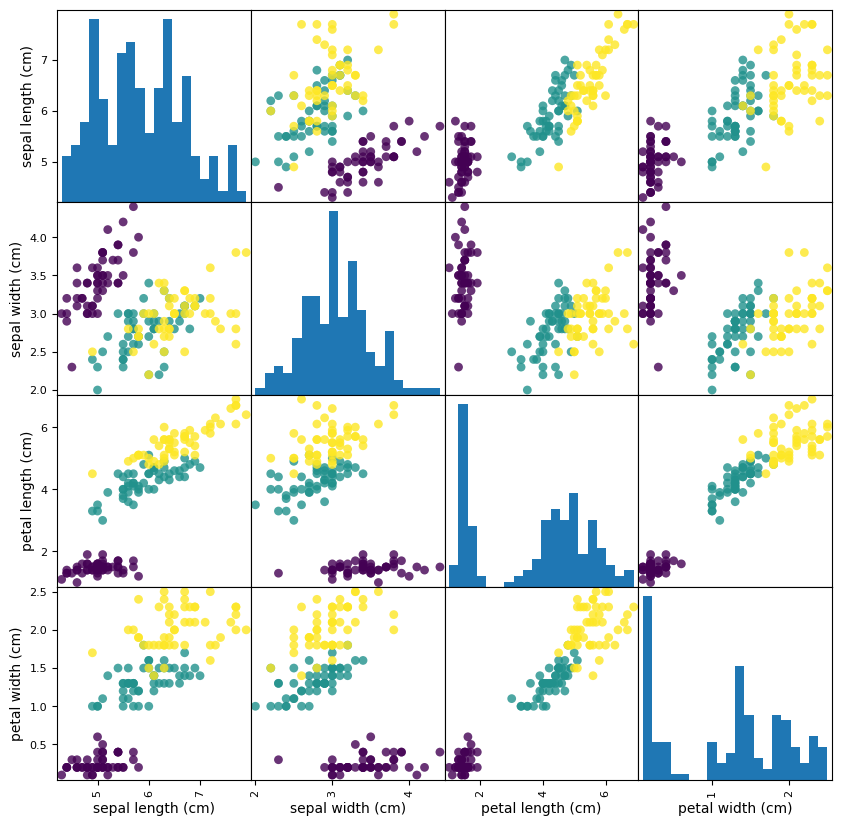

In [160]:
import pandas as pd

iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

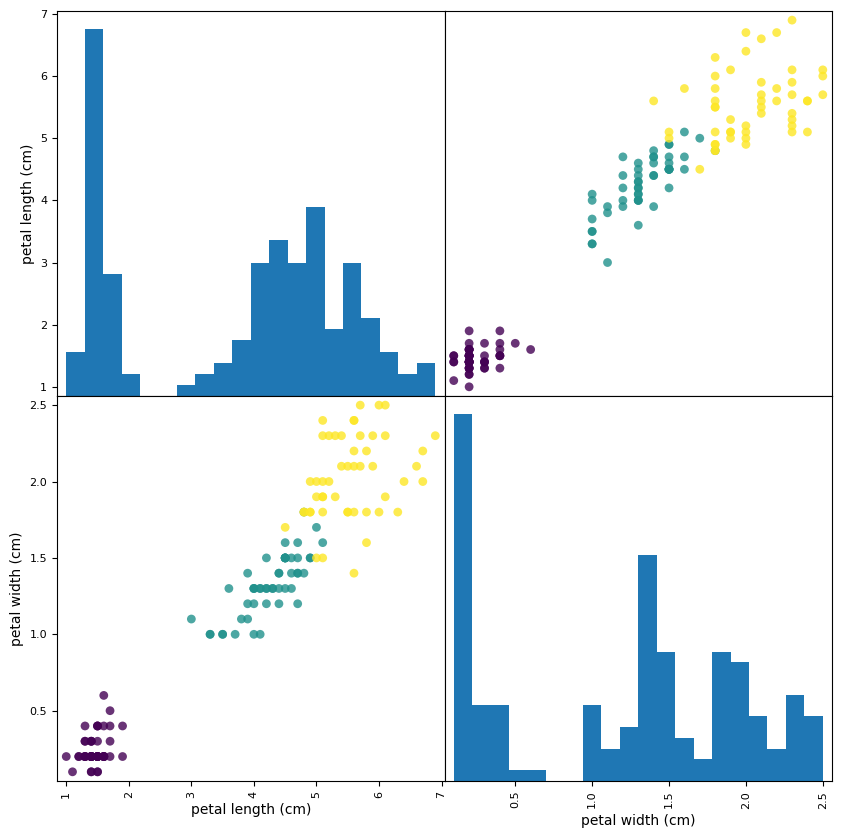

In [161]:
iris_dataframe_simple = pd.DataFrame(iris_dataset.data[:, 2:4], columns=iris_dataset.feature_names[2:4])
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe_simple, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [163]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4],
                                                    iris_dataset['target'],
                                                    random_state=0) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


In [164]:
import numpy as np

x_train_concat = np.concatenate((x_train, y_train.reshape(112, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(38, 1)), axis=1)
print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')

X_train shape: (112, 3),
X_test shape: (38, 3)


In [165]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [166]:
knn_model = knn.fit(x_train, y_train)

In [167]:
knn_predictions = knn.predict(x_test)
knn_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [168]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9736842105263158


In [151]:
from sklearn.datasets import load_iris

In [155]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [169]:
import numpy as np

In [170]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [171]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [172]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [173]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [174]:
import pandas as pd
iris_dataset = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
iris_dataset.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [175]:
iris_dataset_1 = iris_dataset[['sepal length (cm)','petal length (cm)', 'petal width (cm)']]
iris_dataset_2 = iris_dataset[['sepal width (cm)','petal length (cm)', 'petal width (cm)']]

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [176]:
# если работаете в интерактивной оболочке IPython
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

**Пример** построения трехмерного графика

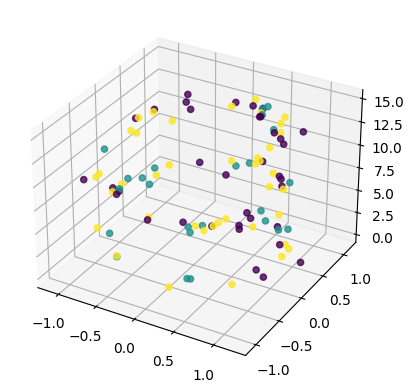

In [177]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

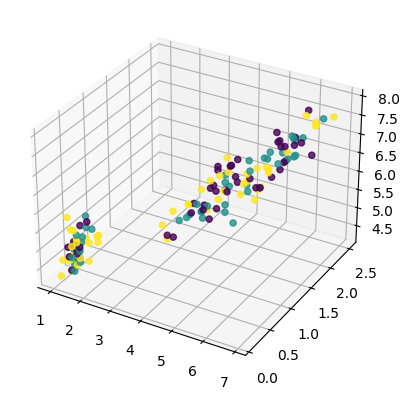

In [178]:
ax = plt.axes(projection='3d')


zdata = iris_dataset_1['sepal length (cm)'] # точки оси Z
xdata = iris_dataset_1['petal length (cm)'] # точки оси X
ydata = iris_dataset_1['petal width (cm)']
colors = np.random.randint(3, size=150)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

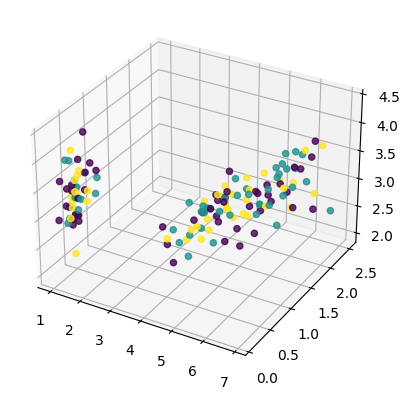

In [179]:
ax = plt.axes(projection='3d')

zdata = iris_dataset_2['sepal width (cm)'] # точки оси Z
xdata = iris_dataset_2['petal length (cm)'] # точки оси X
ydata = iris_dataset_2['petal width (cm)']
colors = np.random.randint(3, size=150)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [191]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset['target'], test_size = 0.2, random_state=0)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset['target'], test_size = 0.2, random_state=0)




In [183]:
print(x_train_1.shape)
print(y_train_1.shape)
print(x_test_1.shape)
print(y_test_1.shape)

(120, 3)
(120,)
(30, 3)
(30,)


In [192]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model_1 = knn.fit(x_train_1, y_train_1)
knn_model_2 = knn.fit(x_train_2, y_train_2)

In [197]:
knn_predictions_1 = knn_model_1.predict(x_test_1)
print(knn_predictions_1)
print(y_test_1)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- sepal length (cm)
Feature names seen at fit time, yet now missing:
- sepal width (cm)


In [194]:
knn_predictions_2 = knn_model_2.predict(x_test_2)
print(knn_predictions_2)
print(y_test_2)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [195]:
from sklearn.metrics import accuracy_score

In [196]:
accuracy_1 = accuracy_score(y_test_1, knn_predictions_1)
accuracy_2 = accuracy_score(y_test_2, knn_predictions_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 1.0, accuracy_2: 1.0


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [198]:
iris_dataset = load_iris()

iris_dataset_for_split = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)

iris_dataset_1 = iris_dataset_for_split[['sepal length (cm)','petal length (cm)', 'petal width (cm)']]

iris_dataset_2 = iris_dataset_for_split[['sepal width (cm)','petal length (cm)', 'petal width (cm)']]

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset['target'], test_size = 0.2, random_state=0)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset['target'], test_size = 0.2, random_state=0)

for i in range(21):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn_model_1 = knn.fit(x_train_1, y_train_1)
    knn_predictions_1 = knn_model_1.predict(x_test_1)
    accuracy_1 = accuracy_score(y_test_1, knn_predictions_1)
    print(f'Accuracy_1: {accuracy_1}, step/iter : {i}')

Accuracy_1: 1.0, step/iter : 0
Accuracy_1: 1.0, step/iter : 1
Accuracy_1: 1.0, step/iter : 2
Accuracy_1: 1.0, step/iter : 3
Accuracy_1: 1.0, step/iter : 4
Accuracy_1: 1.0, step/iter : 5
Accuracy_1: 1.0, step/iter : 6
Accuracy_1: 0.9666666666666667, step/iter : 7
Accuracy_1: 0.9666666666666667, step/iter : 8
Accuracy_1: 0.9666666666666667, step/iter : 9
Accuracy_1: 1.0, step/iter : 10
Accuracy_1: 0.9666666666666667, step/iter : 11
Accuracy_1: 1.0, step/iter : 12
Accuracy_1: 0.9666666666666667, step/iter : 13
Accuracy_1: 1.0, step/iter : 14
Accuracy_1: 1.0, step/iter : 15
Accuracy_1: 1.0, step/iter : 16
Accuracy_1: 1.0, step/iter : 17
Accuracy_1: 1.0, step/iter : 18
Accuracy_1: 1.0, step/iter : 19
Accuracy_1: 1.0, step/iter : 20
